# NN tension prediction for SUPERball
### &nbsp; &nbsp; &nbsp; Chiara Ercolani


Cross validation stuff added. This implementation trains the neural network with a big dataset and then saves it.

Dataset:2017-10-24_BiggerBetterData_1kHz.mat

In [1]:
# Import libraries
import tensorflow as tf
import numpy as np
import collections
import os
import collections
import matplotlib.pyplot as plt
import scipy.io

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
#Combine data from all three datasets
dataset1=scipy.io.loadmat('2018-02-08_Biggester_slow_data.mat')
#dataset2=scipy.io.loadmat('2018-02-01_17_Just_motor22.mat')
#dataset3=scipy.io.loadmat('2018-01-30_16-07_Better_ReallyBig_Data.mat')


In [3]:
effort=dataset1.get('effort')
#effort=np.concatenate((effort,dataset2.get('effort')))
#effort=np.concatenate((effort,dataset3.get('effort')))
print(effort.shape)

(1127580, 25)


In [4]:
#Cross validation parameters
#Number of cross validation boxes
K=10
#Number of samples in each box
set_length=int(len(effort)/K)

In [5]:
#Various paramenters
D=24   #number of features recorded at each time step(sequence length)
#CHANGING BATCH SIZE
batch_size = 500
batch_len =(set_length*(K-1))//batch_size
margin=0.05                                     # accuracy margin
lr=0.0003                                       # learning rate (originally 0.0003)
epochNumber=300                                  # Number of epochs
                                
H = 5*D                                         # size of hidden state

print('train_data_len=',set_length*(K-1),' batch_size=',batch_size,' batch_len=',
      batch_len,' D=',D,'H=',H)

train_data_len= 1014822  batch_size= 500  batch_len= 2029  D= 24 H= 120


In [6]:
#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, target)
Xin= tf.placeholder(tf.float32,shape=[batch_size,D],name='Xin')
Ytarget = tf.placeholder(tf.float32,shape=[batch_size,1],name='Ytarget')

#Xavier initialization for weights 
#http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization
Wx = tf.get_variable("Wx", shape=[D, H],initializer=tf.contrib.layers.xavier_initializer()); print('Wx=',Wx.get_shape())
Wy = tf.get_variable("Wy", shape=[H, 1],initializer=tf.contrib.layers.xavier_initializer()); print('Wy=',Wy.get_shape())

#Biases initalized to 0
bh = tf.Variable(tf.zeros([1,H])); print('bh=',bh.get_shape())
by = tf.Variable(tf.zeros([1,1])); print('by=',by.get_shape())

Wx= (24, 120)
Wy= (120, 1)
bh= (1, 120)
by= (1, 1)


In [7]:
# NN implementation with ReLU function and one hidden layer

h_t=tf.nn.relu(tf.matmul(Xin,Wx)+bh)
y_=tf.add(tf.matmul(h_t,Wy),by,name='y_')

print('Ypredicted=',y_.get_shape())
print('Ytarget=',Ytarget.get_shape())

#Mean Absolute Error cost function

cost=tf.reduce_mean(tf.abs(tf.subtract(y_, Ytarget)))

#Optimizer used to implement backpropagation
#Adding decayed learning rate
#batch_var=tf.Variable(0)
#learning_rate=tf.train.exponential_decay(lr,batch_var*batch_size,len(train_features),0.95,staircase=True)
#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost,global_step=batch_var)

optimizer = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

Ypredicted= (500, 1)
Ytarget= (500, 1)


In [8]:
#ACCURACY INTERVAL
lower_bound =tf.greater_equal(y_,tf.subtract(Ytarget,margin))
upper_bound= tf.less_equal(y_,tf.add(Ytarget,margin))
correct=tf.equal(lower_bound,upper_bound)
#correct=tf.equal(cast_out_data,cast_out_pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
print('Accuracy measure set')

Accuracy measure set


CROSS VALIDATION ITERATION 0
Epoch: 0, Cost: 0.17150375247001648, Accuracy: 0.0
Epoch: 1, Cost: 0.17552199959754944, Accuracy: 0.0
Epoch: 2, Cost: 0.17127613723278046, Accuracy: 0.0
Epoch: 3, Cost: 0.17754048109054565, Accuracy: 0.0
Epoch: 4, Cost: 0.12521009147167206, Accuracy: 0.0
Epoch: 5, Cost: 0.07747936993837357, Accuracy: 0.17800000309944153
Epoch: 6, Cost: 0.07402154803276062, Accuracy: 0.2280000001192093
Epoch: 7, Cost: 0.05040134862065315, Accuracy: 0.5979999899864197
Epoch: 8, Cost: 0.04427768662571907, Accuracy: 0.6579999923706055
Epoch: 9, Cost: 0.03608964383602142, Accuracy: 0.7480000257492065
Epoch: 10, Cost: 0.033732786774635315, Accuracy: 0.765999972820282
Epoch: 11, Cost: 0.029731178656220436, Accuracy: 0.800000011920929
Epoch: 12, Cost: 0.026737766340374947, Accuracy: 0.8420000076293945
Epoch: 13, Cost: 0.025244109332561493, Accuracy: 0.8600000143051147
Epoch: 14, Cost: 0.024245668202638626, Accuracy: 0.8679999709129333
Epoch: 15, Cost: 0.023832008242607117, Accuracy

Epoch: 122, Cost: 0.022025689482688904, Accuracy: 0.878000020980835
Epoch: 123, Cost: 0.025062480941414833, Accuracy: 0.8539999723434448
Epoch: 124, Cost: 0.026197925209999084, Accuracy: 0.8360000252723694
Epoch: 125, Cost: 0.030181927606463432, Accuracy: 0.7979999780654907
Epoch: 126, Cost: 0.022940082475543022, Accuracy: 0.871999979019165
Epoch: 127, Cost: 0.024788687005639076, Accuracy: 0.8560000061988831
Epoch: 128, Cost: 0.021758977323770523, Accuracy: 0.8859999775886536
Epoch: 129, Cost: 0.022210655733942986, Accuracy: 0.878000020980835
Epoch: 130, Cost: 0.02314460650086403, Accuracy: 0.9120000004768372
Epoch: 131, Cost: 0.03131040558218956, Accuracy: 0.8519999980926514
Epoch: 132, Cost: 0.031830646097660065, Accuracy: 0.8539999723434448
Epoch: 133, Cost: 0.026770450174808502, Accuracy: 0.9139999747276306
Epoch: 134, Cost: 0.027560153976082802, Accuracy: 0.8999999761581421
Epoch: 135, Cost: 0.0293838270008564, Accuracy: 0.8799999952316284
Epoch: 136, Cost: 0.02415343001484871, Ac

Epoch: 242, Cost: 0.09153871983289719, Accuracy: 0.05999999865889549
Epoch: 243, Cost: 0.09509116411209106, Accuracy: 0.041999999433755875
Epoch: 244, Cost: 0.09470434486865997, Accuracy: 0.04399999976158142
Epoch: 245, Cost: 0.09423841536045074, Accuracy: 0.04600000008940697
Epoch: 246, Cost: 0.09631941467523575, Accuracy: 0.03799999877810478
Epoch: 247, Cost: 0.0959881916642189, Accuracy: 0.03999999910593033
Epoch: 248, Cost: 0.09699515998363495, Accuracy: 0.035999998450279236
Epoch: 249, Cost: 0.09792223572731018, Accuracy: 0.03200000151991844
Epoch: 250, Cost: 0.09741638600826263, Accuracy: 0.03200000151991844
Epoch: 251, Cost: 0.09430645406246185, Accuracy: 0.04600000008940697
Epoch: 252, Cost: 0.09401033818721771, Accuracy: 0.04600000008940697
Epoch: 253, Cost: 0.0946592167019844, Accuracy: 0.04600000008940697
Epoch: 254, Cost: 0.09453947842121124, Accuracy: 0.04600000008940697
Epoch: 255, Cost: 0.09588339179754257, Accuracy: 0.03999999910593033
Epoch: 256, Cost: 0.08923772722482

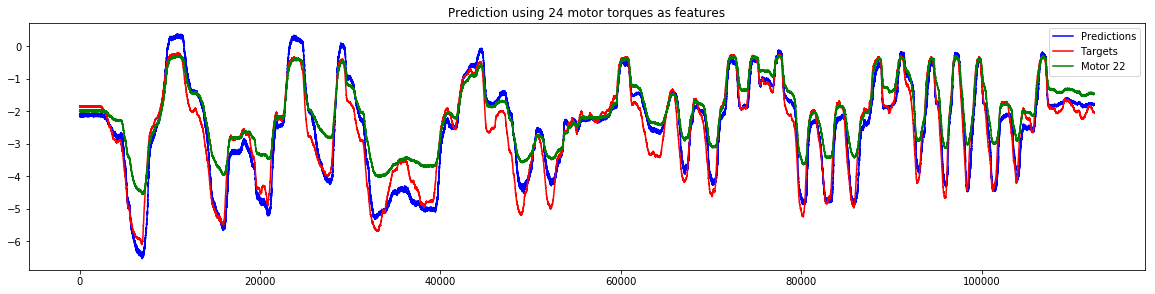

Root mean squared error of prediction 0.467307551573
Root mean squared error of motor 0.704966917039
CROSS VALIDATION ITERATION 1
Epoch: 0, Cost: 0.17196537554264069, Accuracy: 0.0
Epoch: 1, Cost: 0.20236411690711975, Accuracy: 0.0
Epoch: 2, Cost: 0.160725399851799, Accuracy: 0.0
Epoch: 3, Cost: 0.17165091633796692, Accuracy: 0.0
Epoch: 4, Cost: 0.13200634717941284, Accuracy: 0.0
Epoch: 5, Cost: 0.10278180241584778, Accuracy: 0.017999999225139618
Epoch: 6, Cost: 0.08852574974298477, Accuracy: 0.09200000017881393
Epoch: 7, Cost: 0.06995807588100433, Accuracy: 0.28200000524520874
Epoch: 8, Cost: 0.052126772701740265, Accuracy: 0.5680000185966492
Epoch: 9, Cost: 0.03432733193039894, Accuracy: 0.7559999823570251
Epoch: 10, Cost: 0.025950420647859573, Accuracy: 0.8560000061988831
Epoch: 11, Cost: 0.024431675672531128, Accuracy: 0.8700000047683716
Epoch: 12, Cost: 0.025010792538523674, Accuracy: 0.8759999871253967
Epoch: 13, Cost: 0.027192721143364906, Accuracy: 0.8700000047683716
Epoch: 14,

Epoch: 120, Cost: 0.09344354271888733, Accuracy: 0.10999999940395355
Epoch: 121, Cost: 0.1002245768904686, Accuracy: 0.06800000369548798
Epoch: 122, Cost: 0.10046166926622391, Accuracy: 0.06800000369548798
Epoch: 123, Cost: 0.0987262949347496, Accuracy: 0.0860000029206276
Epoch: 124, Cost: 0.10024931281805038, Accuracy: 0.06800000369548798
Epoch: 125, Cost: 0.09754309058189392, Accuracy: 0.09399999678134918
Epoch: 126, Cost: 0.09443581104278564, Accuracy: 0.10599999874830246
Epoch: 127, Cost: 0.08624204248189926, Accuracy: 0.12800000607967377
Epoch: 128, Cost: 0.07662839442491531, Accuracy: 0.17800000309944153
Epoch: 129, Cost: 0.07599185407161713, Accuracy: 0.18000000715255737
Epoch: 130, Cost: 0.08022303134202957, Accuracy: 0.1599999964237213
Epoch: 131, Cost: 0.08189169317483902, Accuracy: 0.15000000596046448
Epoch: 132, Cost: 0.08841890096664429, Accuracy: 0.11800000071525574
Epoch: 133, Cost: 0.09064587205648422, Accuracy: 0.1120000034570694
Epoch: 134, Cost: 0.0918443575501442, A

Epoch: 240, Cost: 0.051782719790935516, Accuracy: 0.36399999260902405
Epoch: 241, Cost: 0.051264192909002304, Accuracy: 0.3779999911785126
Epoch: 242, Cost: 0.05100183188915253, Accuracy: 0.3919999897480011
Epoch: 243, Cost: 0.0515725314617157, Accuracy: 0.3720000088214874
Epoch: 244, Cost: 0.05313819274306297, Accuracy: 0.3440000116825104
Epoch: 245, Cost: 0.04872077330946922, Accuracy: 0.47600001096725464
Epoch: 246, Cost: 0.04930272325873375, Accuracy: 0.4560000002384186
Epoch: 247, Cost: 0.05098336189985275, Accuracy: 0.39399999380111694
Epoch: 248, Cost: 0.048509322106838226, Accuracy: 0.48399999737739563
Epoch: 249, Cost: 0.049627844244241714, Accuracy: 0.4440000057220459
Epoch: 250, Cost: 0.0519675649702549, Accuracy: 0.3619999885559082
Epoch: 251, Cost: 0.049954161047935486, Accuracy: 0.4339999854564667
Epoch: 252, Cost: 0.050546858459711075, Accuracy: 0.4180000126361847
Epoch: 253, Cost: 0.05040160194039345, Accuracy: 0.41999998688697815
Epoch: 254, Cost: 0.0498332604765892, A

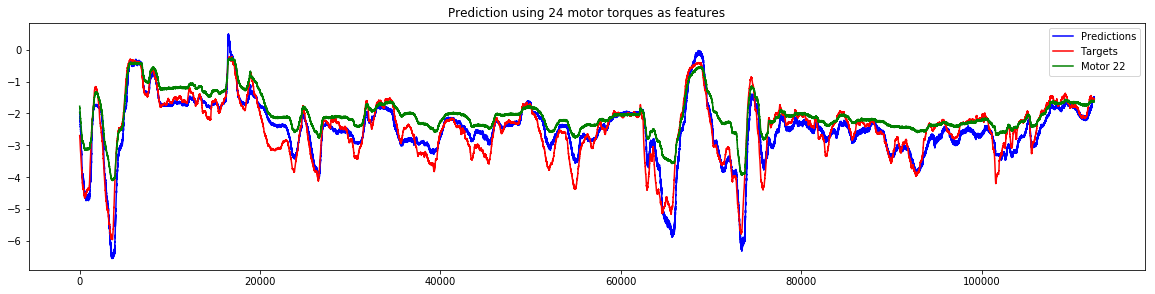

Root mean squared error of prediction 0.391623483688
Root mean squared error of motor 0.648263009002
CROSS VALIDATION ITERATION 2
Epoch: 0, Cost: 0.1060807853937149, Accuracy: 0.0
Epoch: 1, Cost: 0.11953288316726685, Accuracy: 0.0
Epoch: 2, Cost: 0.1413816511631012, Accuracy: 0.0
Epoch: 3, Cost: 0.07786167412996292, Accuracy: 0.19200000166893005
Epoch: 4, Cost: 0.03922766074538231, Accuracy: 0.722000002861023
Epoch: 5, Cost: 0.03329534828662872, Accuracy: 0.7680000066757202
Epoch: 6, Cost: 0.029276417568325996, Accuracy: 0.8019999861717224
Epoch: 7, Cost: 0.026451360434293747, Accuracy: 0.843999981880188
Epoch: 8, Cost: 0.025591686367988586, Accuracy: 0.8560000061988831
Epoch: 9, Cost: 0.024614913389086723, Accuracy: 0.8679999709129333
Epoch: 10, Cost: 0.024561721831560135, Accuracy: 0.8740000128746033
Epoch: 11, Cost: 0.025170883163809776, Accuracy: 0.8759999871253967
Epoch: 12, Cost: 0.02634519338607788, Accuracy: 0.8759999871253967
Epoch: 13, Cost: 0.02866317890584469, Accuracy: 0.8

Epoch: 121, Cost: 0.033884260803461075, Accuracy: 0.777999997138977
Epoch: 122, Cost: 0.04225660860538483, Accuracy: 0.6759999990463257
Epoch: 123, Cost: 0.0604679137468338, Accuracy: 0.3659999966621399
Epoch: 124, Cost: 0.04234062507748604, Accuracy: 0.6740000247955322
Epoch: 125, Cost: 0.063580222427845, Accuracy: 0.31200000643730164
Epoch: 126, Cost: 0.04747585952281952, Accuracy: 0.6079999804496765
Epoch: 127, Cost: 0.06665954738855362, Accuracy: 0.25999999046325684
Epoch: 128, Cost: 0.05294658616185188, Accuracy: 0.5320000052452087
Epoch: 129, Cost: 0.05215832218527794, Accuracy: 0.5360000133514404
Epoch: 130, Cost: 0.04864087328314781, Accuracy: 0.5879999995231628
Epoch: 131, Cost: 0.06028217077255249, Accuracy: 0.3779999911785126
Epoch: 132, Cost: 0.04990360140800476, Accuracy: 0.5740000009536743
Epoch: 133, Cost: 0.05156787857413292, Accuracy: 0.5440000295639038
Epoch: 134, Cost: 0.05410664156079292, Accuracy: 0.5099999904632568
Epoch: 135, Cost: 0.056473538279533386, Accuracy:

Epoch: 242, Cost: 0.06376265734434128, Accuracy: 0.33399999141693115
Epoch: 243, Cost: 0.059902533888816833, Accuracy: 0.41200000047683716
Epoch: 244, Cost: 0.06260038912296295, Accuracy: 0.36000001430511475
Epoch: 245, Cost: 0.06326579302549362, Accuracy: 0.3440000116825104
Epoch: 246, Cost: 0.05956758186221123, Accuracy: 0.4180000126361847
Epoch: 247, Cost: 0.055941883474588394, Accuracy: 0.47999998927116394
Epoch: 248, Cost: 0.055284470319747925, Accuracy: 0.5
Epoch: 249, Cost: 0.049354735761880875, Accuracy: 0.6119999885559082
Epoch: 250, Cost: 0.05506473034620285, Accuracy: 0.5040000081062317
Epoch: 251, Cost: 0.05015140399336815, Accuracy: 0.5979999899864197
Epoch: 252, Cost: 0.05012062191963196, Accuracy: 0.5979999899864197
Epoch: 253, Cost: 0.050529845058918, Accuracy: 0.5960000157356262
Epoch: 254, Cost: 0.050550736486911774, Accuracy: 0.5960000157356262
Epoch: 255, Cost: 0.05046277865767479, Accuracy: 0.5920000076293945
Epoch: 256, Cost: 0.048083528876304626, Accuracy: 0.6240

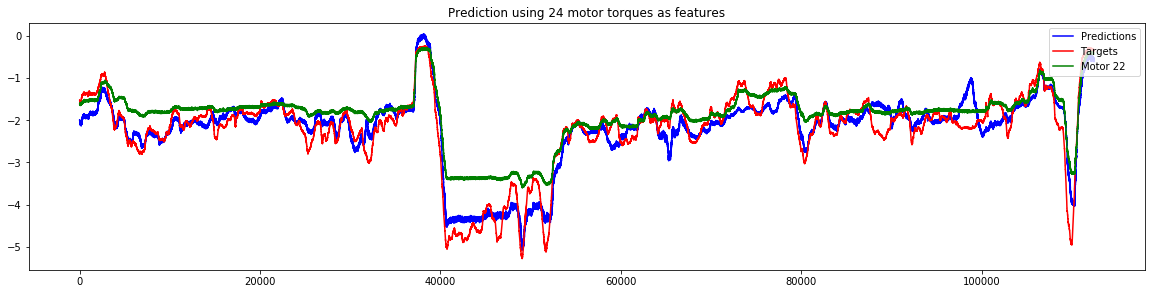

Root mean squared error of prediction 0.336214283861
Root mean squared error of motor 0.50657057068
CROSS VALIDATION ITERATION 3
Epoch: 0, Cost: 0.09588489681482315, Accuracy: 0.012000000104308128
Epoch: 1, Cost: 0.14648419618606567, Accuracy: 0.0
Epoch: 2, Cost: 0.18820218741893768, Accuracy: 0.0
Epoch: 3, Cost: 0.14715902507305145, Accuracy: 0.0
Epoch: 4, Cost: 0.12167869508266449, Accuracy: 0.0020000000949949026
Epoch: 5, Cost: 0.09805559366941452, Accuracy: 0.03400000184774399
Epoch: 6, Cost: 0.0860898569226265, Accuracy: 0.12999999523162842
Epoch: 7, Cost: 0.07668052613735199, Accuracy: 0.20800000429153442
Epoch: 8, Cost: 0.06917231529951096, Accuracy: 0.2939999997615814
Epoch: 9, Cost: 0.06074557825922966, Accuracy: 0.41200000047683716
Epoch: 10, Cost: 0.05345544591546059, Accuracy: 0.5400000214576721
Epoch: 11, Cost: 0.04568367078900337, Accuracy: 0.6359999775886536
Epoch: 12, Cost: 0.03947984054684639, Accuracy: 0.7080000042915344
Epoch: 13, Cost: 0.03524456173181534, Accuracy:

Epoch: 120, Cost: 0.04845402389764786, Accuracy: 0.5139999985694885
Epoch: 121, Cost: 0.04858693107962608, Accuracy: 0.5120000243186951
Epoch: 122, Cost: 0.053356219083070755, Accuracy: 0.43799999356269836
Epoch: 123, Cost: 0.05965857207775116, Accuracy: 0.335999995470047
Epoch: 124, Cost: 0.05406613275408745, Accuracy: 0.4259999990463257
Epoch: 125, Cost: 0.05939522385597229, Accuracy: 0.3440000116825104
Epoch: 126, Cost: 0.05596357583999634, Accuracy: 0.3919999897480011
Epoch: 127, Cost: 0.05975225195288658, Accuracy: 0.34200000762939453
Epoch: 128, Cost: 0.05853647738695145, Accuracy: 0.3499999940395355
Epoch: 129, Cost: 0.06098225340247154, Accuracy: 0.32600000500679016
Epoch: 130, Cost: 0.06231781840324402, Accuracy: 0.3100000023841858
Epoch: 131, Cost: 0.062395378947257996, Accuracy: 0.3100000023841858
Epoch: 132, Cost: 0.057482920587062836, Accuracy: 0.36800000071525574
Epoch: 133, Cost: 0.05812491104006767, Accuracy: 0.3580000102519989
Epoch: 134, Cost: 0.054282981902360916, Ac

Epoch: 241, Cost: 0.0490850992500782, Accuracy: 0.6060000061988831
Epoch: 242, Cost: 0.048000894486904144, Accuracy: 0.6140000224113464
Epoch: 243, Cost: 0.04866119846701622, Accuracy: 0.6100000143051147
Epoch: 244, Cost: 0.04681580513715744, Accuracy: 0.6240000128746033
Epoch: 245, Cost: 0.04214591905474663, Accuracy: 0.6899999976158142
Epoch: 246, Cost: 0.04596357047557831, Accuracy: 0.6439999938011169
Epoch: 247, Cost: 0.04812554270029068, Accuracy: 0.6119999885559082
Epoch: 248, Cost: 0.050003256648778915, Accuracy: 0.5920000076293945
Epoch: 249, Cost: 0.05108935385942459, Accuracy: 0.5640000104904175
Epoch: 250, Cost: 0.047802895307540894, Accuracy: 0.6200000047683716
Epoch: 251, Cost: 0.05196104571223259, Accuracy: 0.5559999942779541
Epoch: 252, Cost: 0.0489102303981781, Accuracy: 0.6039999723434448
Epoch: 253, Cost: 0.05194217711687088, Accuracy: 0.5460000038146973
Epoch: 254, Cost: 0.05208640918135643, Accuracy: 0.5460000038146973
Epoch: 255, Cost: 0.05087311565876007, Accuracy

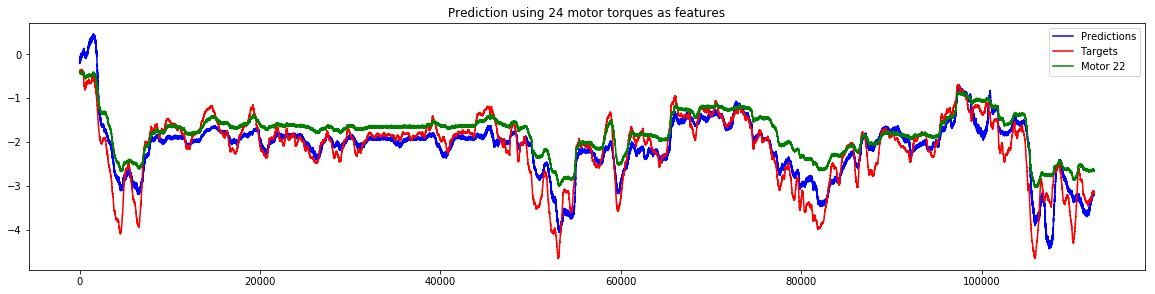

Root mean squared error of prediction 0.354876989973
Root mean squared error of motor 0.509668128996
CROSS VALIDATION ITERATION 4
Epoch: 0, Cost: 0.14739829301834106, Accuracy: 0.0
Epoch: 1, Cost: 0.122025266289711, Accuracy: 0.0
Epoch: 2, Cost: 0.13643060624599457, Accuracy: 0.0
Epoch: 3, Cost: 0.11806359887123108, Accuracy: 0.0
Epoch: 4, Cost: 0.08170241117477417, Accuracy: 0.12999999523162842
Epoch: 5, Cost: 0.032927632331848145, Accuracy: 0.7739999890327454
Epoch: 6, Cost: 0.027974339202046394, Accuracy: 0.8159999847412109
Epoch: 7, Cost: 0.025932421907782555, Accuracy: 0.8399999737739563
Epoch: 8, Cost: 0.02522324025630951, Accuracy: 0.8579999804496765
Epoch: 9, Cost: 0.023791640996932983, Accuracy: 0.871999979019165
Epoch: 10, Cost: 0.023420492187142372, Accuracy: 0.8759999871253967
Epoch: 11, Cost: 0.023588987067341805, Accuracy: 0.8740000128746033
Epoch: 12, Cost: 0.024314379319548607, Accuracy: 0.8820000290870667
Epoch: 13, Cost: 0.024888038635253906, Accuracy: 0.8799999952316

Epoch: 121, Cost: 0.030789785087108612, Accuracy: 0.8560000061988831
Epoch: 122, Cost: 0.030630869790911674, Accuracy: 0.8640000224113464
Epoch: 123, Cost: 0.031093953177332878, Accuracy: 0.8539999723434448
Epoch: 124, Cost: 0.031246716156601906, Accuracy: 0.8500000238418579
Epoch: 125, Cost: 0.03135242685675621, Accuracy: 0.8500000238418579
Epoch: 126, Cost: 0.03125985711812973, Accuracy: 0.8479999899864197
Epoch: 127, Cost: 0.03169912472367287, Accuracy: 0.8339999914169312
Epoch: 128, Cost: 0.03173965588212013, Accuracy: 0.8339999914169312
Epoch: 129, Cost: 0.03171391412615776, Accuracy: 0.8320000171661377
Epoch: 130, Cost: 0.0316244512796402, Accuracy: 0.8339999914169312
Epoch: 131, Cost: 0.03164884075522423, Accuracy: 0.8339999914169312
Epoch: 132, Cost: 0.03173620626330376, Accuracy: 0.8320000171661377
Epoch: 133, Cost: 0.031625896692276, Accuracy: 0.8339999914169312
Epoch: 134, Cost: 0.031870465725660324, Accuracy: 0.8299999833106995
Epoch: 135, Cost: 0.03189016878604889, Accurac

Epoch: 242, Cost: 0.03501911833882332, Accuracy: 0.7599999904632568
Epoch: 243, Cost: 0.03450527787208557, Accuracy: 0.7739999890327454
Epoch: 244, Cost: 0.03449024260044098, Accuracy: 0.7739999890327454
Epoch: 245, Cost: 0.03427370637655258, Accuracy: 0.7760000228881836
Epoch: 246, Cost: 0.034186914563179016, Accuracy: 0.777999997138977
Epoch: 247, Cost: 0.034051232039928436, Accuracy: 0.7799999713897705
Epoch: 248, Cost: 0.033941853791475296, Accuracy: 0.7820000052452087
Epoch: 249, Cost: 0.03367551416158676, Accuracy: 0.7839999794960022
Epoch: 250, Cost: 0.03348816558718681, Accuracy: 0.7900000214576721
Epoch: 251, Cost: 0.03320898488163948, Accuracy: 0.7940000295639038
Epoch: 252, Cost: 0.03307290002703667, Accuracy: 0.7940000295639038
Epoch: 253, Cost: 0.03314478322863579, Accuracy: 0.7940000295639038
Epoch: 254, Cost: 0.03289814293384552, Accuracy: 0.7960000038146973
Epoch: 255, Cost: 0.032851334661245346, Accuracy: 0.7960000038146973
Epoch: 256, Cost: 0.03285514935851097, Accura

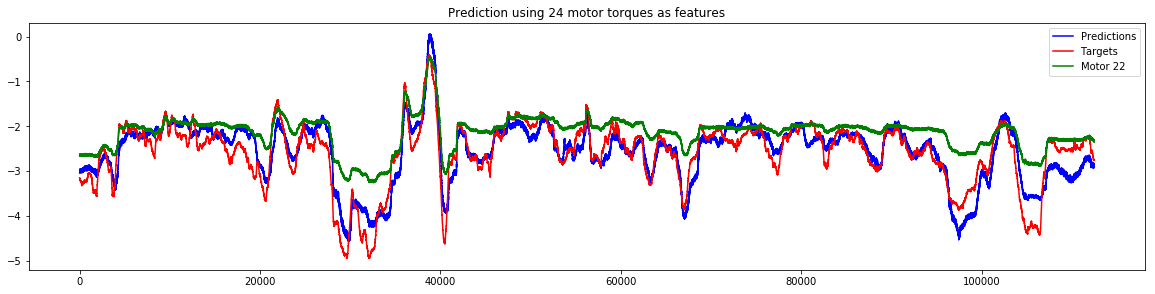

Root mean squared error of prediction 0.334136256257
Root mean squared error of motor 0.597981153298
CROSS VALIDATION ITERATION 5
Epoch: 0, Cost: 0.12655898928642273, Accuracy: 0.0
Epoch: 1, Cost: 0.1428188681602478, Accuracy: 0.0
Epoch: 2, Cost: 0.1332937628030777, Accuracy: 0.0
Epoch: 3, Cost: 0.11011885106563568, Accuracy: 0.006000000052154064
Epoch: 4, Cost: 0.1007460504770279, Accuracy: 0.01600000075995922
Epoch: 5, Cost: 0.06506283581256866, Accuracy: 0.36000001430511475
Epoch: 6, Cost: 0.0352095402777195, Accuracy: 0.7480000257492065
Epoch: 7, Cost: 0.026559626683592796, Accuracy: 0.8460000157356262
Epoch: 8, Cost: 0.025479018688201904, Accuracy: 0.8640000224113464
Epoch: 9, Cost: 0.025994110852479935, Accuracy: 0.8659999966621399
Epoch: 10, Cost: 0.026971524581313133, Accuracy: 0.8679999709129333
Epoch: 11, Cost: 0.02797568589448929, Accuracy: 0.8460000157356262
Epoch: 12, Cost: 0.029784198850393295, Accuracy: 0.8259999752044678
Epoch: 13, Cost: 0.031362615525722504, Accuracy: 

Epoch: 121, Cost: 0.06991618126630783, Accuracy: 0.23199999332427979
Epoch: 122, Cost: 0.06380944699048996, Accuracy: 0.2639999985694885
Epoch: 123, Cost: 0.07203605771064758, Accuracy: 0.21799999475479126
Epoch: 124, Cost: 0.06918726116418839, Accuracy: 0.23600000143051147
Epoch: 125, Cost: 0.066526398062706, Accuracy: 0.25200000405311584
Epoch: 126, Cost: 0.06657303124666214, Accuracy: 0.25200000405311584
Epoch: 127, Cost: 0.06362323462963104, Accuracy: 0.25999999046325684
Epoch: 128, Cost: 0.06417251378297806, Accuracy: 0.257999986410141
Epoch: 129, Cost: 0.06329593807458878, Accuracy: 0.2639999985694885
Epoch: 130, Cost: 0.06861568987369537, Accuracy: 0.23800000548362732
Epoch: 131, Cost: 0.05689576640725136, Accuracy: 0.34200000762939453
Epoch: 132, Cost: 0.05434247478842735, Accuracy: 0.3799999952316284
Epoch: 133, Cost: 0.0600169375538826, Accuracy: 0.2879999876022339
Epoch: 134, Cost: 0.061036065220832825, Accuracy: 0.27799999713897705
Epoch: 135, Cost: 0.06162036582827568, Acc

Epoch: 241, Cost: 0.05721370130777359, Accuracy: 0.3479999899864197
Epoch: 242, Cost: 0.04465833306312561, Accuracy: 0.5740000009536743
Epoch: 243, Cost: 0.04877901449799538, Accuracy: 0.4959999918937683
Epoch: 244, Cost: 0.044227246195077896, Accuracy: 0.5860000252723694
Epoch: 245, Cost: 0.04749791696667671, Accuracy: 0.5139999985694885
Epoch: 246, Cost: 0.04464639350771904, Accuracy: 0.5740000009536743
Epoch: 247, Cost: 0.05155229941010475, Accuracy: 0.4480000138282776
Epoch: 248, Cost: 0.047686945647001266, Accuracy: 0.5099999904632568
Epoch: 249, Cost: 0.047122299671173096, Accuracy: 0.5220000147819519
Epoch: 250, Cost: 0.04740717262029648, Accuracy: 0.5180000066757202
Epoch: 251, Cost: 0.04970822110772133, Accuracy: 0.47600001096725464
Epoch: 252, Cost: 0.046152349561452866, Accuracy: 0.5360000133514404
Epoch: 253, Cost: 0.0456305593252182, Accuracy: 0.5460000038146973
Epoch: 254, Cost: 0.047303251922130585, Accuracy: 0.5199999809265137
Epoch: 255, Cost: 0.04504998400807381, Accu

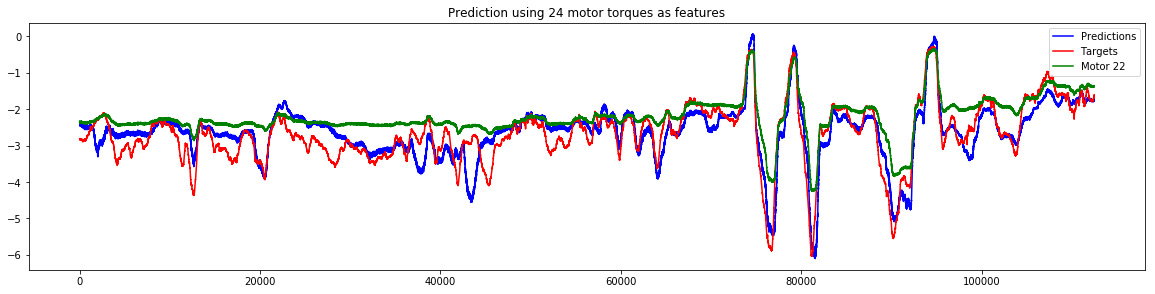

Root mean squared error of prediction 0.433809899981
Root mean squared error of motor 0.618567791639
CROSS VALIDATION ITERATION 6
Epoch: 0, Cost: 0.125905379652977, Accuracy: 0.0
Epoch: 1, Cost: 0.08891105651855469, Accuracy: 0.02199999988079071
Epoch: 2, Cost: 0.10401313006877899, Accuracy: 0.006000000052154064
Epoch: 3, Cost: 0.024675030261278152, Accuracy: 0.906000018119812
Epoch: 4, Cost: 0.03554782271385193, Accuracy: 0.7799999713897705
Epoch: 5, Cost: 0.03968064859509468, Accuracy: 0.7099999785423279
Epoch: 6, Cost: 0.04211518540978432, Accuracy: 0.6620000004768372
Epoch: 7, Cost: 0.04904049634933472, Accuracy: 0.47200000286102295
Epoch: 8, Cost: 0.0511685349047184, Accuracy: 0.4359999895095825
Epoch: 9, Cost: 0.0533570721745491, Accuracy: 0.4000000059604645
Epoch: 10, Cost: 0.05894826352596283, Accuracy: 0.30799999833106995
Epoch: 11, Cost: 0.06053377687931061, Accuracy: 0.29600000381469727
Epoch: 12, Cost: 0.06100289151072502, Accuracy: 0.2879999876022339
Epoch: 13, Cost: 0.061

Epoch: 120, Cost: 0.04628926143050194, Accuracy: 0.5260000228881836
Epoch: 121, Cost: 0.04510790482163429, Accuracy: 0.5600000023841858
Epoch: 122, Cost: 0.042297713458538055, Accuracy: 0.6119999885559082
Epoch: 123, Cost: 0.03989160805940628, Accuracy: 0.6819999814033508
Epoch: 124, Cost: 0.03868385776877403, Accuracy: 0.7099999785423279
Epoch: 125, Cost: 0.039087407290935516, Accuracy: 0.6940000057220459
Epoch: 126, Cost: 0.03851419687271118, Accuracy: 0.7139999866485596
Epoch: 127, Cost: 0.037331871688365936, Accuracy: 0.7379999756813049
Epoch: 128, Cost: 0.03725465387105942, Accuracy: 0.7400000095367432
Epoch: 129, Cost: 0.037973083555698395, Accuracy: 0.7360000014305115
Epoch: 130, Cost: 0.037989530712366104, Accuracy: 0.7360000014305115
Epoch: 131, Cost: 0.039055898785591125, Accuracy: 0.6959999799728394
Epoch: 132, Cost: 0.03916536271572113, Accuracy: 0.6919999718666077
Epoch: 133, Cost: 0.03950260579586029, Accuracy: 0.6859999895095825
Epoch: 134, Cost: 0.03987531736493111, Acc

Epoch: 241, Cost: 0.0254962258040905, Accuracy: 0.8799999952316284
Epoch: 242, Cost: 0.02534877508878708, Accuracy: 0.878000020980835
Epoch: 243, Cost: 0.025675620883703232, Accuracy: 0.8759999871253967
Epoch: 244, Cost: 0.02543056569993496, Accuracy: 0.878000020980835
Epoch: 245, Cost: 0.02557354047894478, Accuracy: 0.8799999952316284
Epoch: 246, Cost: 0.025534426793456078, Accuracy: 0.8799999952316284
Epoch: 247, Cost: 0.025041431188583374, Accuracy: 0.871999979019165
Epoch: 248, Cost: 0.025554688647389412, Accuracy: 0.878000020980835
Epoch: 249, Cost: 0.02510026842355728, Accuracy: 0.871999979019165
Epoch: 250, Cost: 0.02508505992591381, Accuracy: 0.871999979019165
Epoch: 251, Cost: 0.025207409635186195, Accuracy: 0.878000020980835
Epoch: 252, Cost: 0.026080869138240814, Accuracy: 0.8840000033378601
Epoch: 253, Cost: 0.025802867487072945, Accuracy: 0.878000020980835
Epoch: 254, Cost: 0.025507202371954918, Accuracy: 0.878000020980835
Epoch: 255, Cost: 0.02521524764597416, Accuracy: 0

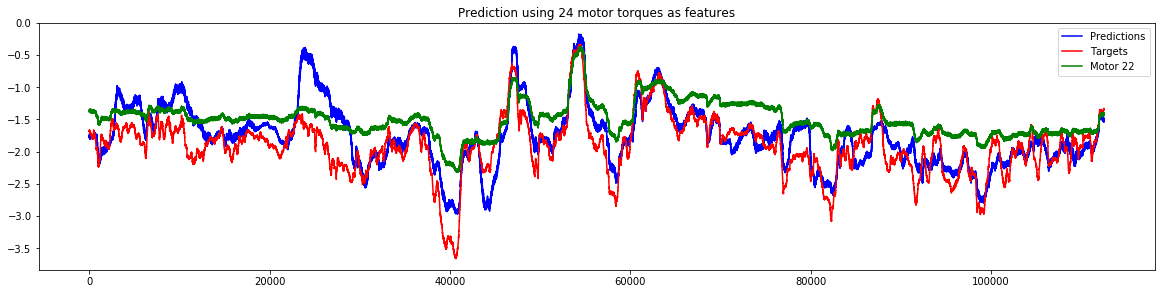

Root mean squared error of prediction 0.338667000564
Root mean squared error of motor 0.484682121934
CROSS VALIDATION ITERATION 7
Epoch: 0, Cost: 0.11459365487098694, Accuracy: 0.0
Epoch: 1, Cost: 0.17647992074489594, Accuracy: 0.0
Epoch: 2, Cost: 0.15907590091228485, Accuracy: 0.0
Epoch: 3, Cost: 0.16654321551322937, Accuracy: 0.0
Epoch: 4, Cost: 0.1218617632985115, Accuracy: 0.0
Epoch: 5, Cost: 0.09352138638496399, Accuracy: 0.04399999976158142
Epoch: 6, Cost: 0.0762198194861412, Accuracy: 0.18799999356269836
Epoch: 7, Cost: 0.05927179753780365, Accuracy: 0.4339999854564667
Epoch: 8, Cost: 0.04710131883621216, Accuracy: 0.6359999775886536
Epoch: 9, Cost: 0.03535066172480583, Accuracy: 0.7540000081062317
Epoch: 10, Cost: 0.02848639339208603, Accuracy: 0.8080000281333923
Epoch: 11, Cost: 0.024686668068170547, Accuracy: 0.8659999966621399
Epoch: 12, Cost: 0.023375511169433594, Accuracy: 0.8740000128746033
Epoch: 13, Cost: 0.023966582491993904, Accuracy: 0.8820000290870667
Epoch: 14, Cos

Epoch: 122, Cost: 0.03708614781498909, Accuracy: 0.7160000205039978
Epoch: 123, Cost: 0.03700733557343483, Accuracy: 0.7200000286102295
Epoch: 124, Cost: 0.04049604758620262, Accuracy: 0.6439999938011169
Epoch: 125, Cost: 0.037164002656936646, Accuracy: 0.7160000205039978
Epoch: 126, Cost: 0.03732321038842201, Accuracy: 0.7160000205039978
Epoch: 127, Cost: 0.04418014734983444, Accuracy: 0.5799999833106995
Epoch: 128, Cost: 0.036926817148923874, Accuracy: 0.7179999947547913
Epoch: 129, Cost: 0.040865104645490646, Accuracy: 0.6320000290870667
Epoch: 130, Cost: 0.036677900701761246, Accuracy: 0.7179999947547913
Epoch: 131, Cost: 0.04016713425517082, Accuracy: 0.6499999761581421
Epoch: 132, Cost: 0.03648730367422104, Accuracy: 0.7239999771118164
Epoch: 133, Cost: 0.037136152386665344, Accuracy: 0.7179999947547913
Epoch: 134, Cost: 0.03685465827584267, Accuracy: 0.7120000123977661
Epoch: 135, Cost: 0.03759385272860527, Accuracy: 0.7039999961853027
Epoch: 136, Cost: 0.04133761674165726, Accu

Epoch: 243, Cost: 0.04619985818862915, Accuracy: 0.5519999861717224
Epoch: 244, Cost: 0.042585112154483795, Accuracy: 0.6000000238418579
Epoch: 245, Cost: 0.044985298067331314, Accuracy: 0.5640000104904175
Epoch: 246, Cost: 0.04407237842679024, Accuracy: 0.5799999833106995
Epoch: 247, Cost: 0.04310399666428566, Accuracy: 0.593999981880188
Epoch: 248, Cost: 0.043142858892679214, Accuracy: 0.5960000157356262
Epoch: 249, Cost: 0.0436713807284832, Accuracy: 0.5899999737739563
Epoch: 250, Cost: 0.04623948782682419, Accuracy: 0.550000011920929
Epoch: 251, Cost: 0.04403814673423767, Accuracy: 0.5820000171661377
Epoch: 252, Cost: 0.04322243854403496, Accuracy: 0.5920000076293945
Epoch: 253, Cost: 0.04391925781965256, Accuracy: 0.5860000252723694
Epoch: 254, Cost: 0.04513490945100784, Accuracy: 0.5600000023841858
Epoch: 255, Cost: 0.04376744106411934, Accuracy: 0.5879999995231628
Epoch: 256, Cost: 0.04361151158809662, Accuracy: 0.5899999737739563
Epoch: 257, Cost: 0.04404908046126366, Accuracy:

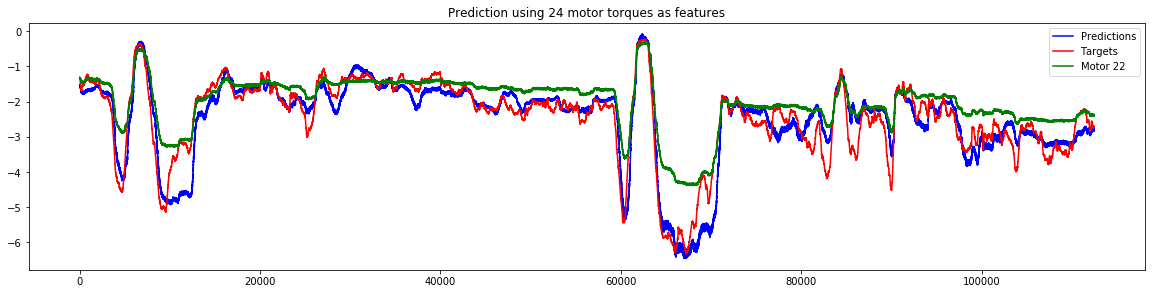

Root mean squared error of prediction 0.468462564984
Root mean squared error of motor 0.669012319451
CROSS VALIDATION ITERATION 8
Epoch: 0, Cost: 0.16214151680469513, Accuracy: 0.0
Epoch: 1, Cost: 0.19878432154655457, Accuracy: 0.0
Epoch: 2, Cost: 0.16789111495018005, Accuracy: 0.0
Epoch: 3, Cost: 0.1379312425851822, Accuracy: 0.0
Epoch: 4, Cost: 0.10132067650556564, Accuracy: 0.02800000086426735
Epoch: 5, Cost: 0.07668806612491608, Accuracy: 0.23399999737739563
Epoch: 6, Cost: 0.05801526457071304, Accuracy: 0.4740000069141388
Epoch: 7, Cost: 0.04331497102975845, Accuracy: 0.6700000166893005
Epoch: 8, Cost: 0.03482063114643097, Accuracy: 0.7580000162124634
Epoch: 9, Cost: 0.02989284135401249, Accuracy: 0.7940000295639038
Epoch: 10, Cost: 0.02742615155875683, Accuracy: 0.828000009059906
Epoch: 11, Cost: 0.02606390044093132, Accuracy: 0.8519999980926514
Epoch: 12, Cost: 0.025888023898005486, Accuracy: 0.8619999885559082
Epoch: 13, Cost: 0.027829613536596298, Accuracy: 0.8579999804496765


Epoch: 121, Cost: 0.03998204693198204, Accuracy: 0.6600000262260437
Epoch: 122, Cost: 0.04003213346004486, Accuracy: 0.6579999923706055
Epoch: 123, Cost: 0.03760237619280815, Accuracy: 0.7179999947547913
Epoch: 124, Cost: 0.038937803357839584, Accuracy: 0.6779999732971191
Epoch: 125, Cost: 0.037748824805021286, Accuracy: 0.7120000123977661
Epoch: 126, Cost: 0.03404117748141289, Accuracy: 0.7879999876022339
Epoch: 127, Cost: 0.033773474395275116, Accuracy: 0.7979999780654907
Epoch: 128, Cost: 0.03159219026565552, Accuracy: 0.843999981880188
Epoch: 129, Cost: 0.031302109360694885, Accuracy: 0.8399999737739563
Epoch: 130, Cost: 0.027647562325000763, Accuracy: 0.8859999775886536
Epoch: 131, Cost: 0.025970913469791412, Accuracy: 0.8840000033378601
Epoch: 132, Cost: 0.028373030945658684, Accuracy: 0.8820000290870667
Epoch: 133, Cost: 0.02786765992641449, Accuracy: 0.8820000290870667
Epoch: 134, Cost: 0.030152680352330208, Accuracy: 0.8679999709129333
Epoch: 135, Cost: 0.02518428862094879, Ac

Epoch: 241, Cost: 0.03240708261728287, Accuracy: 0.8119999766349792
Epoch: 242, Cost: 0.03329598158597946, Accuracy: 0.7900000214576721
Epoch: 243, Cost: 0.03342340141534805, Accuracy: 0.7860000133514404
Epoch: 244, Cost: 0.03330352529883385, Accuracy: 0.7900000214576721
Epoch: 245, Cost: 0.032412536442279816, Accuracy: 0.8119999766349792
Epoch: 246, Cost: 0.032128747552633286, Accuracy: 0.8159999847412109
Epoch: 247, Cost: 0.03231113404035568, Accuracy: 0.8140000104904175
Epoch: 248, Cost: 0.03340333700180054, Accuracy: 0.7900000214576721
Epoch: 249, Cost: 0.034347161650657654, Accuracy: 0.7580000162124634
Epoch: 250, Cost: 0.03437132388353348, Accuracy: 0.7559999823570251
Epoch: 251, Cost: 0.0337093286216259, Accuracy: 0.7860000133514404
Epoch: 252, Cost: 0.03301769867539406, Accuracy: 0.7919999957084656
Epoch: 253, Cost: 0.03240300714969635, Accuracy: 0.8140000104904175
Epoch: 254, Cost: 0.033208221197128296, Accuracy: 0.7879999876022339
Epoch: 255, Cost: 0.032664962112903595, Accur

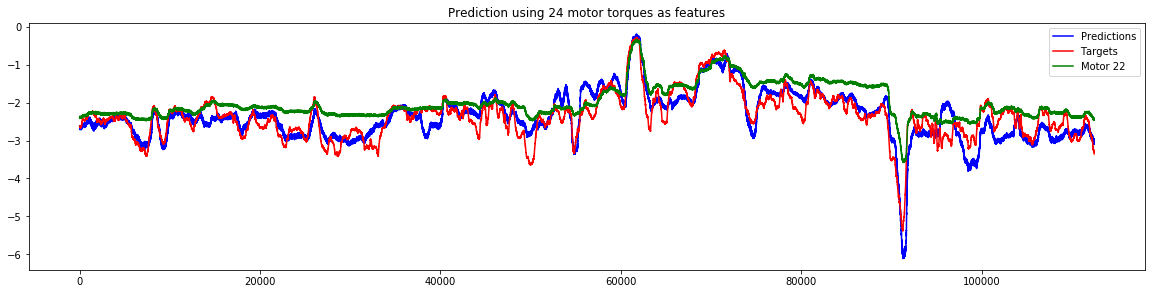

Root mean squared error of prediction 0.338211400791
Root mean squared error of motor 0.490501644841
CROSS VALIDATION ITERATION 9
Epoch: 0, Cost: 0.21255135536193848, Accuracy: 0.10599999874830246
Epoch: 1, Cost: 0.2510835528373718, Accuracy: 0.10599999874830246
Epoch: 2, Cost: 0.296148419380188, Accuracy: 0.03999999910593033
Epoch: 3, Cost: 0.3291691839694977, Accuracy: 0.0
Epoch: 4, Cost: 0.3563918173313141, Accuracy: 0.0
Epoch: 5, Cost: 0.3580992817878723, Accuracy: 0.0
Epoch: 6, Cost: 0.3588408827781677, Accuracy: 0.0
Epoch: 7, Cost: 0.35105079412460327, Accuracy: 0.0
Epoch: 8, Cost: 0.338802307844162, Accuracy: 0.0
Epoch: 9, Cost: 0.3388041853904724, Accuracy: 0.0
Epoch: 10, Cost: 0.3323896825313568, Accuracy: 0.0
Epoch: 11, Cost: 0.33203136920928955, Accuracy: 0.0
Epoch: 12, Cost: 0.3274446427822113, Accuracy: 0.0
Epoch: 13, Cost: 0.33241090178489685, Accuracy: 0.0
Epoch: 14, Cost: 0.3344229757785797, Accuracy: 0.0
Epoch: 15, Cost: 0.32942408323287964, Accuracy: 0.0
Epoch: 16, Co

Epoch: 147, Cost: 0.24432553350925446, Accuracy: 0.0860000029206276
Epoch: 148, Cost: 0.24515047669410706, Accuracy: 0.07999999821186066
Epoch: 149, Cost: 0.24244128167629242, Accuracy: 0.0820000022649765
Epoch: 150, Cost: 0.24120213091373444, Accuracy: 0.0820000022649765
Epoch: 151, Cost: 0.23837116360664368, Accuracy: 0.09200000017881393
Epoch: 152, Cost: 0.23188768327236176, Accuracy: 0.09200000017881393
Epoch: 153, Cost: 0.2296135574579239, Accuracy: 0.09399999678134918
Epoch: 154, Cost: 0.23422212898731232, Accuracy: 0.08799999952316284
Epoch: 155, Cost: 0.2265762835741043, Accuracy: 0.09600000083446503
Epoch: 156, Cost: 0.22697003185749054, Accuracy: 0.09600000083446503
Epoch: 157, Cost: 0.22091354429721832, Accuracy: 0.09799999743700027
Epoch: 158, Cost: 0.22699840366840363, Accuracy: 0.09200000017881393
Epoch: 159, Cost: 0.22078263759613037, Accuracy: 0.10199999809265137
Epoch: 160, Cost: 0.2150368094444275, Accuracy: 0.1080000028014183
Epoch: 161, Cost: 0.2131638526916504, Acc

Epoch: 267, Cost: 0.21385888755321503, Accuracy: 0.11400000005960464
Epoch: 268, Cost: 0.21752521395683289, Accuracy: 0.1080000028014183
Epoch: 269, Cost: 0.21475178003311157, Accuracy: 0.10999999940395355
Epoch: 270, Cost: 0.21808457374572754, Accuracy: 0.1080000028014183
Epoch: 271, Cost: 0.21703338623046875, Accuracy: 0.1080000028014183
Epoch: 272, Cost: 0.21580329537391663, Accuracy: 0.1120000034570694
Epoch: 273, Cost: 0.21590563654899597, Accuracy: 0.1080000028014183
Epoch: 274, Cost: 0.21830858290195465, Accuracy: 0.1080000028014183
Epoch: 275, Cost: 0.21625979244709015, Accuracy: 0.1080000028014183
Epoch: 276, Cost: 0.21871377527713776, Accuracy: 0.1080000028014183
Epoch: 277, Cost: 0.21759210526943207, Accuracy: 0.1080000028014183
Epoch: 278, Cost: 0.22080141305923462, Accuracy: 0.10599999874830246
Epoch: 279, Cost: 0.21890193223953247, Accuracy: 0.1080000028014183
Epoch: 280, Cost: 0.22031545639038086, Accuracy: 0.10599999874830246
Epoch: 281, Cost: 0.2203148454427719, Accura

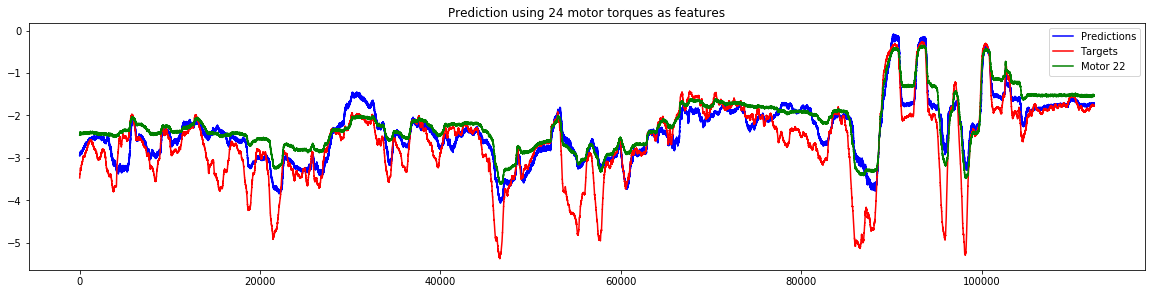

Root mean squared error of prediction 0.556349469498
Root mean squared error of motor 0.618121314779
[ 0.46730755  0.39162348  0.33621428  0.35487699  0.33413626  0.4338099
  0.338667    0.46846256  0.3382114   0.55634947]
[ 0.70496692  0.64826301  0.50657057  0.50966813  0.59798115  0.61856779
  0.48468212  0.66901232  0.49050164  0.61812131]


In [9]:
init_op = tf.global_variables_initializer()
rmse=[]
rmse_motor=[]
for k in range(0,K):
    print("CROSS VALIDATION ITERATION",k)
    # Initializing session    
    sess = tf.Session()
    sess.run(init_op)

    #Define saver object to save NN
    saver=tf.train.Saver()
    train_features= effort[0:k*set_length,0:D]
    train_features=np.concatenate((train_features,effort[(k+1)*set_length:K*set_length,0:D]))
    
    test_features= effort[k*set_length:(k+1)*set_length,0:D]
    
    train_target= effort[0:k*set_length,D]
    train_target=np.concatenate((train_target,effort[(k+1)*set_length:K*set_length,D]))
    
    test_target=effort[k*set_length:(k+1)*set_length,D]
    
    #Reshaping data
    train_features=np.asarray(train_features)
    train_features=np.reshape(train_features,[len(train_features),D])
    test_features=np.asarray(test_features)
    test_features=np.reshape(test_features,[len(test_features),D])
    train_target=np.asarray(train_target)
    train_target=np.reshape(train_target,[len(train_target),1])
    test_target=np.asarray(test_target) 
    test_target=np.reshape(test_target,[len(test_target),1]) 

    costs = []

    #setting up training
    for epoch in range(epochNumber):
        total_batch=int(len(train_features)/batch_size)
        for i in range(total_batch):   
            inp_data= train_features[i*batch_size:(i+1)*batch_size,:]
            out_data= train_target[i*batch_size:(i+1)*batch_size,:]
            _,acc,c = sess.run([optimizer,accuracy,cost],feed_dict={Xin: inp_data, Ytarget: out_data})
        print("Epoch: {}, Cost: {}, Accuracy: {}".format(epoch,c,acc))
        costs.append(c)

    #Save session after training
    saver.save(sess,'NN_tension_pred_saver',global_step=k)

    print ("\nTraining complete!")

    predicted=[]
    test_batch=int(len(test_features)/batch_size)

    #Test prediction with test dataset
    for j in range (test_batch):    
        inp_data = test_features[j*batch_size:(j+1)*batch_size,:]
        pred = sess.run(y_, feed_dict={Xin: inp_data})
        predicted=np.append(predicted,pred)

    #Plot prediction against real data from test dataset
    x=np.arange(0,len(test_target[0:(batch_size*test_batch)]))
    y_pred= predicted
    y_tar= test_target[0:(batch_size*test_batch)]
    #y3=-test_features[:,21]*0.0175/0.008
    y_motor=-test_features[0:(batch_size*test_batch),21]*0.0175/0.008

    fig= plt.figure(figsize=(20,10))
    ax1=plt.subplot(211)
    ax1.plot(x,y_pred,'b',label='Predictions')
    ax1.plot(x,y_tar,'r',label='Targets')
    ax1.plot(x,y_motor,'g',label='Motor 22')
    ax1.legend(loc="upper right")

    plt.title('Prediction using 24 motor torques as features')

    plt.show()
    
    rmse=np.append(rmse,sqrt(mean_squared_error(y_pred,y_tar)))
    rmse_motor=np.append(rmse_motor,sqrt(mean_squared_error(y_motor,y_tar)))
    print("Root mean squared error of prediction",rmse[k])
    print("Root mean squared error of motor",rmse_motor[k])

    sess.close()
print(rmse)
print(rmse_motor)

In [ ]:
#batch_size=800, lr=0.0001, K=10, H=4*D, epoch_number=100 
#[ 0.50253549  0.43781634  0.32040607  0.32329862  0.36412889  0.35812448
#  0.27207648  0.43003502  0.32162693  0.40849026]
#[ 0.70579643  0.64966416  0.50766536  0.50934368  0.59895063  0.61945065
#  0.48574498  0.67014488  0.48967202  0.61927773]
#
#batch_size=100, lr=0.0003, K=10, H=5*D, epoch_number=100
#[ 0.46218572  0.44220819  0.39805842  0.41903569  0.3219875   0.3759407
#  0.35630052  0.46268236  0.37257996  0.54600813]
#[ 0.70500703  0.64769705  0.50612557  0.50971187  0.59769723  0.61814086
#  0.48427049  0.66855334  0.4923125   0.61763899]


#batch_size=500, lr=0.0003, K=10, H=5*D, epoch_number=100
[ 0.45112949  0.41166623  0.3488705   0.33144462  0.30662881  0.37951444
  0.26394875  0.4951899   0.29257544  0.48440297]
[ 0.70496692  0.64826301  0.50657057  0.50966813  0.59798115  0.61856779
  0.48468212  0.66901232  0.49050164  0.61812131]

